Dataset Overview and Cleaning

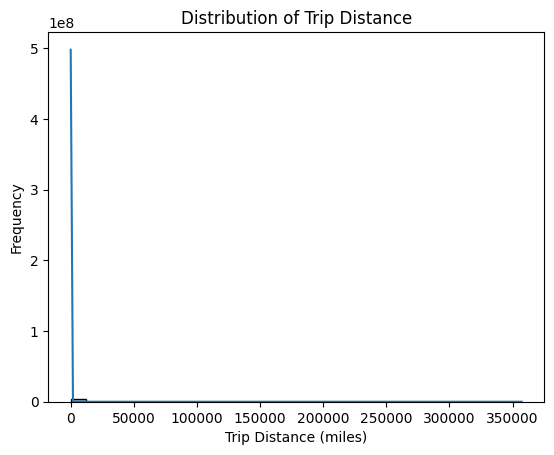

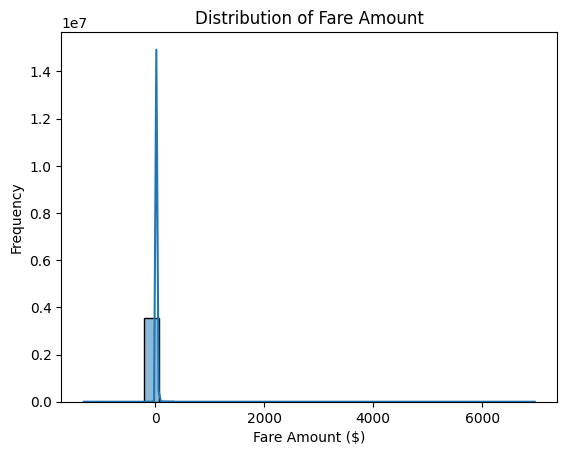

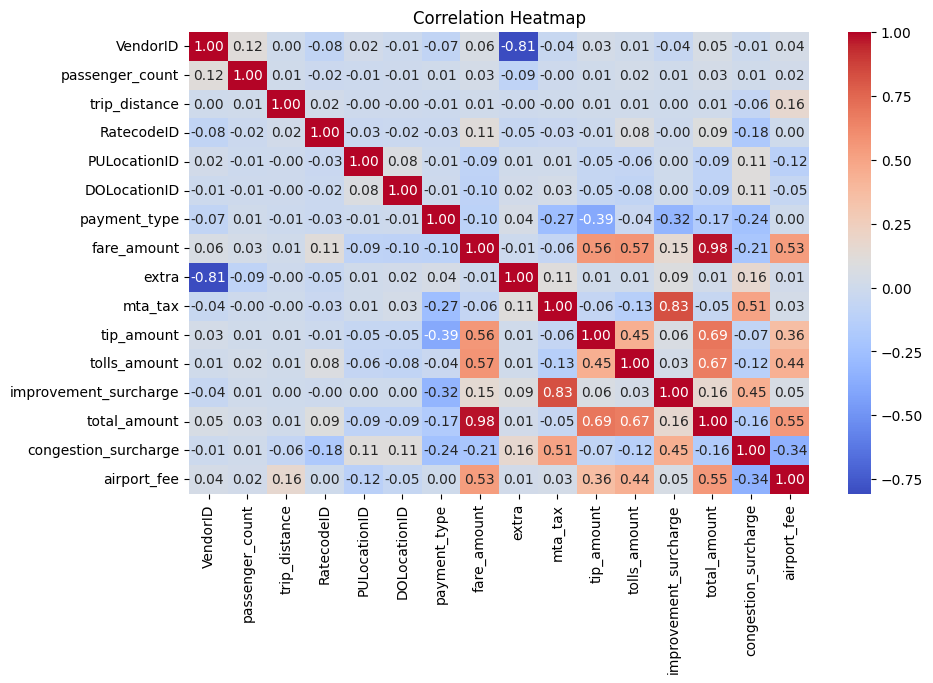

In [1]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the updated DataLoader class
sys.path.append(str(Path("../src").resolve()))
from data.data_loader import DataLoader

# Define file paths
data_path = "../data/raw/yellow_tripdata_2022-05.parquet"
output_path = "../data/processed/cleaned_yellow_tripdata_2022-05.parquet"

# Initialize the DataLoader
loader = DataLoader(data_path, output_path)

# Preprocess the data (this step generates the cleaned data file)
loader.preprocess()

# Load the preprocessed data
cleaned_df = pd.read_parquet(output_path)

# Visualize the data
# Distribution of trip distance
sns.histplot(cleaned_df['trip_distance'], kde=True, bins=30)
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

# Distribution of fare amount
if 'fare_amount' in cleaned_df.columns:
    sns.histplot(cleaned_df['fare_amount'], kde=True, bins=30)
    plt.title("Distribution of Fare Amount")
    plt.xlabel("Fare Amount ($)")
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap
numeric_df = cleaned_df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

